In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Change the current working directory to a specific folder in your Google Drive
import os
os.chdir('/content/drive/My Drive/Colab/NLP Project/final/Datasets')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv('latenthatred.csv')

In [ ]:
len(data)

18352

In [ ]:
nltk.download('stopwords')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def process_message(review_text):
    # remove all the special characters
    new_review_text = re.sub("[^a-zA-Z]", " ",review_text)
    # convert all letters to lower case
    words = new_review_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

In [ ]:
data['clean_tweet']=data['post'].apply(lambda x: process_message(x))

In [ ]:
data.head()

,post,class,clean_tweet
0,such racism goy there is only shared h...,1,racism goy shared human heritage rt uc merced ...
1,rt and the color of facist fiction is white,1,rt color facist fiction white
2,girl sure you can wait must coz your allah...,0,girl sure wait must coz allah yet decided whet...
3,who are their supporters black people or white...,0,supporter black people white people audience b...
4,you re wrong i m white and my kids are white,0,wrong white kid white


In [ ]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)

    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst

    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

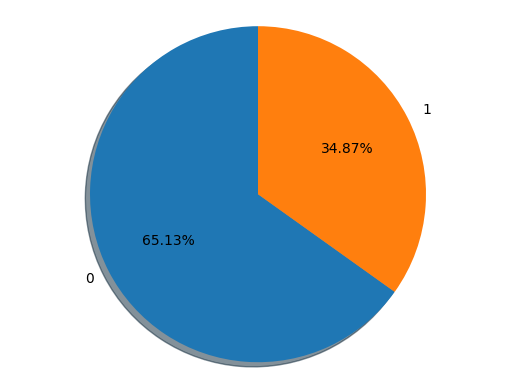

In [ ]:
createPieChartFor(data["class"])

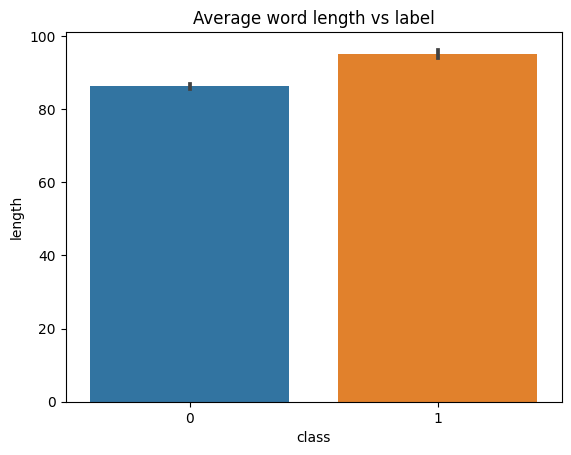

In [ ]:
data['length'] = data['post'].apply(len)
# Make sure 'label' and 'length' are replaced with the actual column names in your DataFrame
fig1 = sns.barplot(x='class', y='length', data=data)

plt.title('Average word length vs label')
plt.show()



In [ ]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    sentiment_num = 1 if sentiment== 'Hate' else 0
    temp_df = training_data[training_data.label==sentiment_num]
    words = " ".join(temp_df.clean_tweet)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

In [ ]:
data

,post,class,clean_tweet,length
0,such racism goy there is only shared h...,1,racism goy shared human heritage rt uc merced ...,107
1,rt and the color of facist fiction is white,1,rt color facist fiction white,49
2,girl sure you can wait must coz your allah...,0,girl sure wait must coz allah yet decided whet...,126
3,who are their supporters black people or white...,0,supporter black people white people audience b...,201
4,you re wrong i m white and my kids are white,0,wrong white kid white,44
...,...,...,...,...
18347,i think he s a bigger fraud than milo,0,think bigger fraud milo,37
18348,the league of the south is not the klan and ou...,0,league south klan protest uvalda nothing gay m...,104
18349,one thing is happening european unity the in...,0,one thing happening european unity invasion br...,93
18350,i guess this is an example of the bad few ...,0,guess example bad mayor pizzafork mentioned ri...,120


In [ ]:
data['text']=data['clean_tweet']
data['label']=data['class']

# Create a new DataFrame with only the 'clean_tweet' and 'label' columns
new_df = data[['text', 'label']]

# Specify the path for the new CSV file
new_file_path = 'cleaned_latenthatred.csv'

# Save the new DataFrame to the new CSV file
new_df.to_csv(new_file_path, index=False)